In [1]:
%matplotlib inline


# Augment Speech and Sound for Machine Learning


Use PySoundTool to augment audio signals. 

To see how PySoundTool implements this, see `pysoundtool.augment`.

Note: PySoundTool is an experimental framework. This is a package mainly for exploring sound in the context of machine learning; testing of functionality is in constant progress.



In [2]:
# to be able to import pysoundtool from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool as pyst;
import IPython.display as ipd

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of typ

### Let's work with speech and sound (car horn)




In [4]:
# Use function 'string2path' to turn string path into pathlib object 
# This allows flexibility across operating systems
speech_path = pyst.string2pathlib('audiodata/python.wav')
honk_path = pyst.string2pathlib('audiodata/car_horn.wav')

## Hear and see speech 

(later we'll examine the non-speech sound)




In [5]:
sr = 16000
f, sr = pyst.loadsound(speech_path, sr=sr)
ipd.Audio(f,rate=sr)

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/core/spectrum.py:1607: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  warnings.warn('power_to_db was called on complex input so phase '


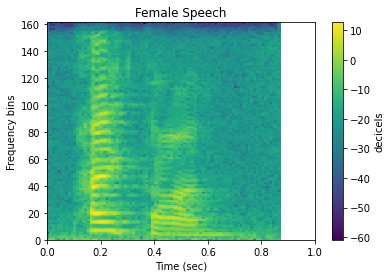

In [6]:
pyst.plotsound(f, sr=sr, feature_type='stft', title='Female Speech')

Augmentation appropriate for speech signals 
-------------------------------------------



### Change Speed



Let's increase the speed by 15% (default setting).


In [7]:
fast = pyst.augment.speed_increase(f, sr=sr, rate = 1.15)

In [8]:
ipd.Audio(fast,rate=sr)

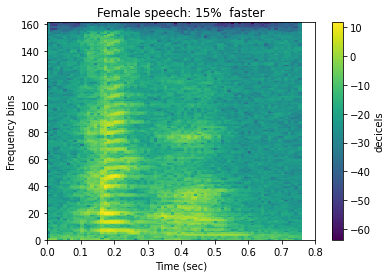

In [9]:
pyst.plotsound(fast, sr=sr, feature_type='stft', 
               title='Female speech: 15%  faster')

Let's decrease the speed by 15%:



In [10]:
slow = pyst.augment.speed_decrease(f, sr=sr, rate = 0.85)

In [11]:
ipd.Audio(slow,rate=sr)

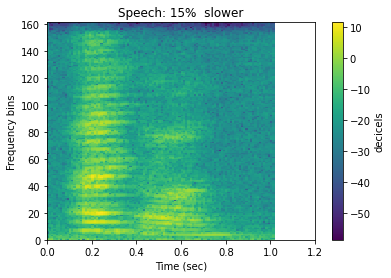

In [12]:
pyst.plotsound(slow, sr=sr, feature_type='stft', 
               title='Speech: 15%  slower')

### Add Noise




Add white noise: 10 SNR



In [13]:
noisy = pyst.augment.add_white_noise(f, sr=sr, snr = 10)

original snr 17.11710304929483


In [14]:
ipd.Audio(noisy,rate=sr)

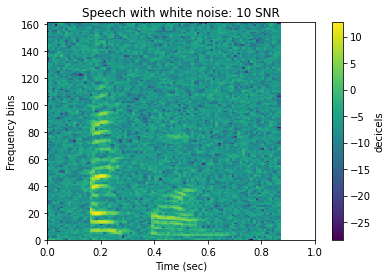

In [15]:
pyst.plotsound(noisy, sr=sr, feature_type='stft', 
               title='Speech with white noise: 10 SNR')

### Harmonic Distortion


In [16]:
hd = pyst.augment.harmonic_distortion(f, sr=sr)

In [17]:
ipd.Audio(hd,rate=sr)

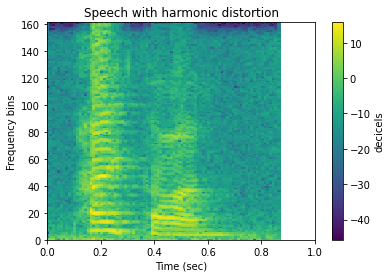

In [18]:
pyst.plotsound(hd, sr=sr, feature_type='stft', 
               title='Speech with harmonic distortion')

### Pitch Shift


#### Pitch shift increase



In [19]:
psi = pyst.augment.pitchshift_i(f, sr=sr, num_semitones = 2)

In [20]:
ipd.Audio(psi,rate=sr)

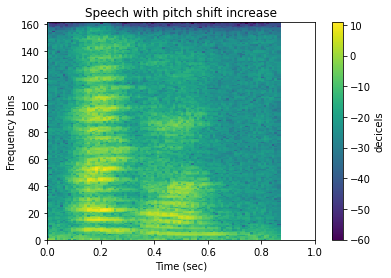

In [21]:
pyst.plotsound(psi, sr=sr, feature_type='stft', 
               title='Speech with pitch shift increase')

#### Pitch shift decrease



In [22]:
psd = pyst.augment.pitchshift_d(f, sr=sr, num_semitones = -2)

In [23]:
ipd.Audio(psd,rate=sr)

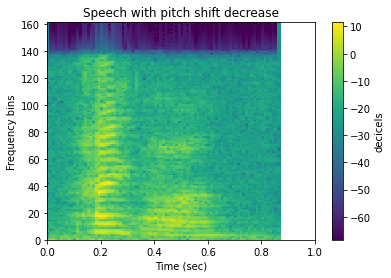

In [24]:
pyst.plotsound(psd, sr=sr, feature_type='stft', 
               title='Speech with pitch shift decrease')

### Vocal Tract Length Perturbation (VTLP)

(by factor 0.8 to 1.2)


#### Vocal tract length perturbation: factor 0.8



In [25]:
vtlp_stft, a = pyst.augment.vtlp(f, sr=sr, win_size_ms = 50,
                                 percent_overlap = 0.5,
                                 random_seed = 41)

In order to listen to this, we need to turn the stft into 
samples:



In [26]:
vtlp_y = pyst.feats.feats2audio(vtlp_stft, sr = sr,
                                feature_type = 'stft',
                                win_size_ms = 50,
                                percent_overlap = 0.5)
ipd.Audio(vtlp_y,rate=sr)

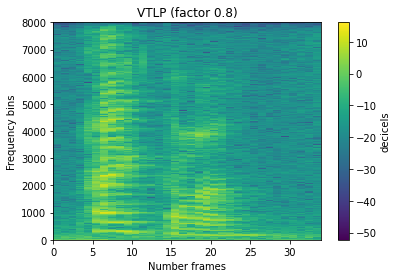

In [27]:
pyst.feats.plot(vtlp_stft, sr=sr, feature_type='stft', 
               title='VTLP (factor {})'.format(a))

#### Vocal tract length perturbation: factor 1.2



In [28]:
vtlp_stft, a = pyst.augment.vtlp(f, sr=sr, win_size_ms = 50,
                                 percent_overlap = 0.5,
                                 random_seed = 43)

In order to listen to this, we need to turn the stft into 
samples:



In [29]:
vtlp_y = pyst.feats.feats2audio(vtlp_stft, sr = sr,
                                feature_type = 'stft',
                                win_size_ms = 50,
                                percent_overlap = 0.5)
ipd.Audio(vtlp_y,rate=sr)

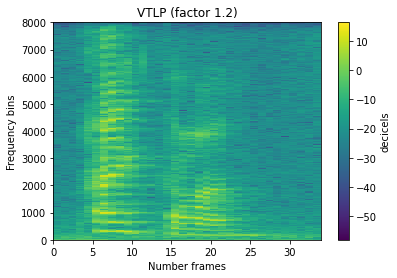

In [30]:
pyst.feats.plot(vtlp_stft, sr=sr, feature_type='stft', 
               title='VTLP (factor {})'.format(a))

Augmentation appropriate for non-speech signals 
-----------------------------------------------



## Hear and see sound signal 



In [32]:
sr = 16000
h, sr = pyst.loadsound(honk_path, sr=sr)
ipd.Audio(h,rate=sr)

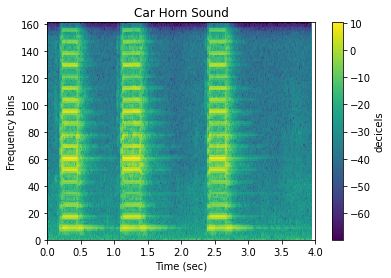

In [33]:
pyst.plotsound(h, sr=sr, feature_type='stft', 
               title='Car Horn Sound')

### Time Shift



We'll apply a random shift to the sound



In [34]:
h_shift = pyst.augment.shift(h, sr=sr)

In [35]:
ipd.Audio(h_shift,rate=sr)

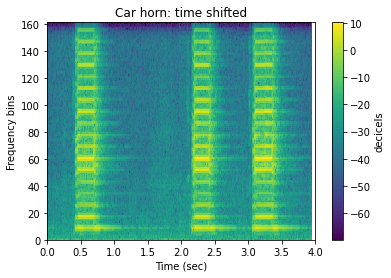

In [36]:
pyst.plotsound(h_shift, sr=sr, feature_type='stft', 
               title='Car horn: time shifted')

### Shuffle the Sound

It's hard to tell the difference between the time shift and shuffle with this sound, but the difference is that `shufflesound` divides the sound into `num_subsections` and then shuffles it, while `shift` is divides the sound into just 2 sections and swaps them.


In [40]:
h_shuffle = pyst.augment.shufflesound(h, sr=sr,
                                      num_subsections = 5)

In [41]:
ipd.Audio(h_shuffle,rate=sr)

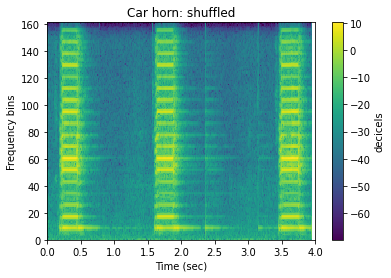

In [42]:
pyst.plotsound(h_shuffle, sr=sr, feature_type='stft', 
               title='Car horn: shuffled')

### Add Noise


#### Add white noise as SNR 10



In [43]:
h_noisy = pyst.augment.add_white_noise(h, sr=sr, snr = 10)

original snr 13.494296727869393


In [44]:
ipd.Audio(h_noisy,rate=sr)

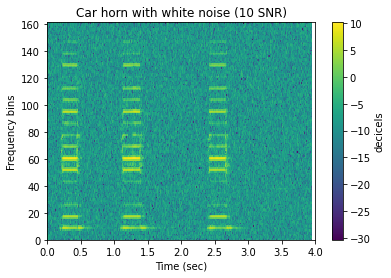

In [45]:
pyst.plotsound(h_noisy, sr=sr, feature_type='stft', 
               title='Car horn with white noise (10 SNR)')